#  Import Needed Libraries 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt 


# EDA

In [2]:
df=pd.read_csv("twitter_training.csv")
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
columns =["ID","Entity","Label","Text"]
df=pd.read_csv("twitter_training.csv",names=columns)
df

,ID,Entity,Label,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      74682 non-null  int64 
 1   Entity  74682 non-null  object
 2   Label   74682 non-null  object
 3   Text    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# Handle Null 

In [5]:
df.dropna(inplace=True)


# Analysis

In [6]:
x=df["Entity"].value_counts()
x

Entity
LeagueOfLegends                      2377
MaddenNFL                            2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
johnson&johnson                      2324
FIFA                                 2324
TomClancysGhostRecon                 2321
Overwatch                            2316
Battlefield                          2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                

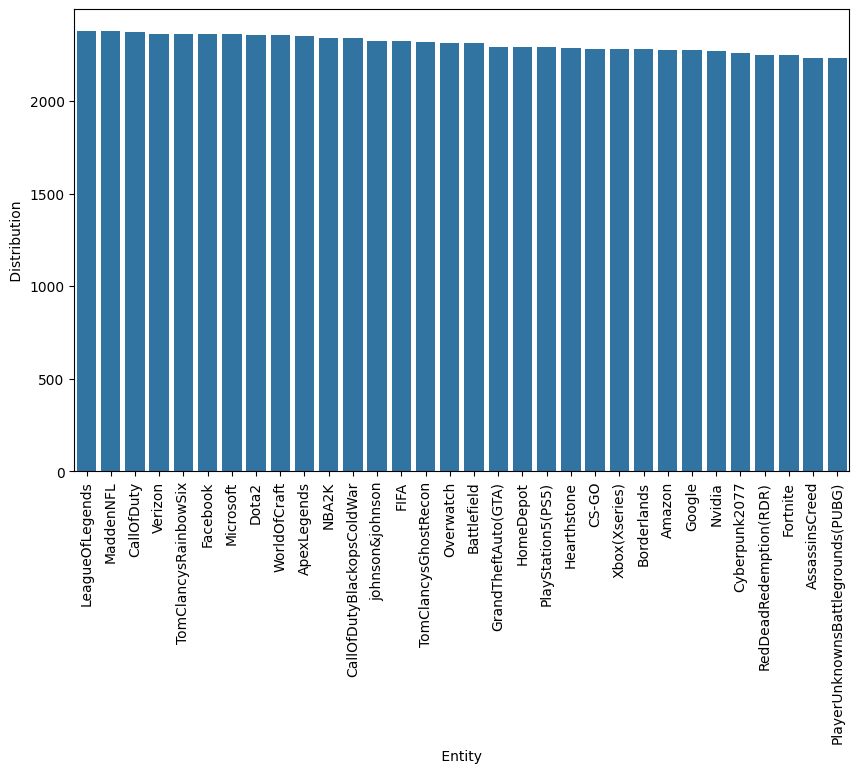

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x=x.index,y=x.values)
plt.xlabel(" Entity ")
plt.ylabel(" Distribution ")
plt.xticks(rotation=90)
plt.show()

In [8]:
y=df["Label"].value_counts()
y

Label
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

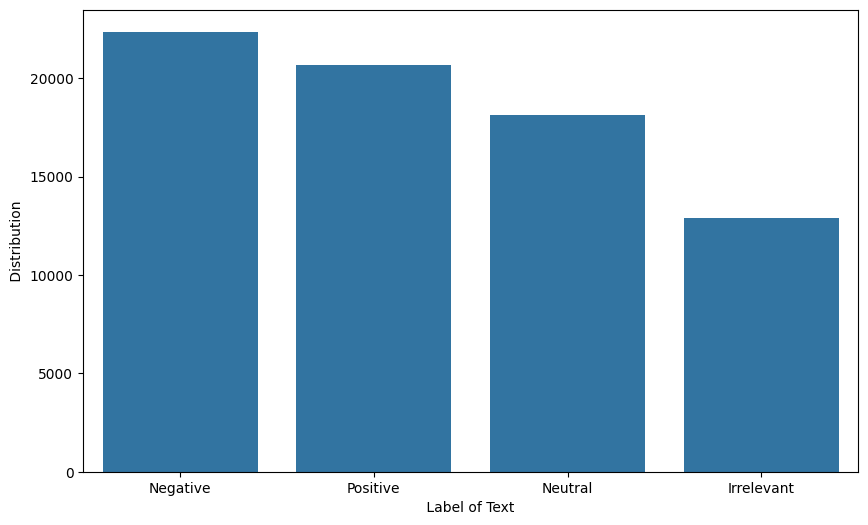

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=y.index,y=y.values)
plt.xlabel(" Label of Text ")
plt.ylabel(" Distribution ")
plt.show()

In [10]:
for i in range(10):
    print(f"{i+1}: {df['Text'][i]} -> {df['Label'][i]}")

1: im getting on borderlands and i will murder you all , -> Positive
2: I am coming to the borders and I will kill you all, -> Positive
3: im getting on borderlands and i will kill you all, -> Positive
4: im coming on borderlands and i will murder you all, -> Positive
5: im getting on borderlands 2 and i will murder you me all, -> Positive
6: im getting into borderlands and i can murder you all, -> Positive
7: So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg -> Positive
8: So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here's the original picture compared to the creation I made:) Have fun! pic.twitter.com / m

# Preprocessing 

In [11]:
nlp=spacy.load("en_core_web_sm")

#  Lemmatization and Remove Stope Words 

In [43]:
# use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [49]:
df['Preprocessed Text'] = df['Text'].apply(preprocess) 


KeyboardInterrupt: 

In [47]:
df

,ID,Entity,Label,Text,Preprocessed Text
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,m get borderland murder
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,m get borderland kill
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,m come borderland murder
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder
...,...,...,...,...,...
74677,9200,Nvidia,3,Just realized that the Windows partition of my...,realize Windows partition Mac like 6 year Nvid...
74678,9200,Nvidia,3,Just realized that my Mac window partition is ...,realize Mac window partition 6 year Nvidia dri...
74679,9200,Nvidia,3,Just realized the windows partition of my Mac ...,realize window partition Mac 6 year Nvidia dri...
74680,9200,Nvidia,3,Just realized between the windows partition of...,realize window partition Mac like 6 year Nvidi...


# Encoding

In [48]:
encoder=LabelEncoder()
df["Label"]=encoder.fit_transform(df['Label'])
df

,ID,Entity,Label,Text,Preprocessed Text
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,m get borderland murder
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,m get borderland kill
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,m come borderland murder
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder
...,...,...,...,...,...
74677,9200,Nvidia,3,Just realized that the Windows partition of my...,realize Windows partition Mac like 6 year Nvid...
74678,9200,Nvidia,3,Just realized that my Mac window partition is ...,realize Mac window partition 6 year Nvidia dri...
74679,9200,Nvidia,3,Just realized the windows partition of my Mac ...,realize window partition Mac 6 year Nvidia dri...
74680,9200,Nvidia,3,Just realized between the windows partition of...,realize window partition Mac like 6 year Nvidi...


# Split Data 

In [44]:
x=df["Preprocessed Text"]
y= df['Label']
X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size=0.2, random_state=42, stratify=df['Label'])


In [16]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (59196,)
Shape of X_test:  (14800,)


# Machine Learning Models 

# create Classifier 

In [17]:
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (MultinomialNB()))         
])

# Train 

In [18]:
clf.fit(X_train, y_train)


Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', MultinomialNB())])

# Predict

In [19]:
y_pred = clf.predict(X_test)


In [20]:
print(accuracy_score(y_test, y_pred))


0.7322972972972973


# Bad Result 

In [21]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.46      0.62      2575
           1       0.65      0.90      0.76      4472
           2       0.84      0.64      0.72      3622
           3       0.71      0.81      0.76      4131

    accuracy                           0.73     14800
   macro avg       0.79      0.70      0.71     14800
weighted avg       0.77      0.73      0.72     14800



# Try by Anthor model

# RFC

In [22]:
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (RandomForestClassifier()))         
])

In [23]:
clf.fit(X_train, y_train)


Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', RandomForestClassifier())])

In [24]:
y_pred = clf.predict(X_test)


In [25]:
print(accuracy_score(y_test, y_pred))


0.9121621621621622


In [26]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2575
           1       0.93      0.93      0.93      4472
           2       0.93      0.89      0.91      3622
           3       0.85      0.94      0.90      4131

    accuracy                           0.91     14800
   macro avg       0.92      0.91      0.91     14800
weighted avg       0.92      0.91      0.91     14800



# Test 

In [27]:
test_df = pd.read_csv('twitter_validation.csv', names=columns)
test_df.head()

,ID,Entity,Label,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [28]:
test_text_processed = test_df["Text"].apply(batch_preprocess)
test_text_processed

0      [,  , m, e, n, t, , o, n, e, d,  , o, n,  , f,...
1      [b, b, c,  , n, e, w, s,  , ,  , , m, , z, o, ...
2      [, M, , c, r, o, s, o, f, t,  , W, h, y,  , d,...
3      [c, s, g, o,  , m, , t, c, h, m, , k, , n, g, ...
4      [n, o, w,  , t, h, e,  , p, r, e, s, , d, e, n...
                             ...                        
995    [⭐, ️,  , t, o, r, o, n, t, o,  , , s,  , t, h...
996    [t, h, , s,  , , s,  , , c, t, u, , l, l, Y,  ...
997    [t, o, d, , y,  , s, u, c, k, e, d,  , s, o,  ...
998    [b, o, u, g, h, t,  , ,  , f, r, , c, t, , o, ...
999    [J, o, h, n, s, o, n,  , ,  , J, o, h, n, s, o...
Name: Text, Length: 1000, dtype: object

In [29]:
print(type(test_text_processed))
test_text_processed

<class 'pandas.core.series.Series'>


0      [,  , m, e, n, t, , o, n, e, d,  , o, n,  , f,...
1      [b, b, c,  , n, e, w, s,  , ,  , , m, , z, o, ...
2      [, M, , c, r, o, s, o, f, t,  , W, h, y,  , d,...
3      [c, s, g, o,  , m, , t, c, h, m, , k, , n, g, ...
4      [n, o, w,  , t, h, e,  , p, r, e, s, , d, e, n...
                             ...                        
995    [⭐, ️,  , t, o, r, o, n, t, o,  , , s,  , t, h...
996    [t, h, , s,  , , s,  , , c, t, u, , l, l, Y,  ...
997    [t, o, d, , y,  , s, u, c, k, e, d,  , s, o,  ...
998    [b, o, u, g, h, t,  , ,  , f, r, , c, t, , o, ...
999    [J, o, h, n, s, o, n,  , ,  , J, o, h, n, s, o...
Name: Text, Length: 1000, dtype: object

In [40]:

my_series = pd.Series(["This is tweet one.", "This is tweet two.", "This is tweet three."])

# Now you can join the flattened list into a single string
# Convert the Series to a list of strings and then join them
test_text_string = ' '.join(my_series.astype(str))

# Now you can use series_as_string with the TF-IDF Vectorizer

# Use the string for prediction
test_text = clf.predict([test_text_string])  # Wrap in a list if predict expects a list of documents

In [41]:
classes = ['Irrelevant', 'Natural', 'Negative', 'Positive']

print(f"True Label: {test_df['Label'][10]}")
print(f'Predict Label: {classes[test_text[10]]}')

True Label: Positive


IndexError: index 10 is out of bounds for axis 0 with size 1

In [30]:
# # Assuming your test data is in test_data['Text']
# X_test = test_df['Text']
# y_test = test_df['Label']

# # Make predictions directly using the pipeline
# test_predictions = clf.predict(X_test)

# # Convert predictions to the same type as y_test
# if isinstance(y_test.iloc[0], str):
#     # If y_test contains strings, convert predictions to strings
#     test_predictions = ['Positive' if pred == 1 else 'Negative' for pred in test_predictions]
# elif isinstance(y_test.iloc[0], (int, float)):
#     # If y_test contains numbers, ensure predictions are numbers
#     test_predictions = test_predictions.astype(int)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, test_predictions)
# print(f"Test accuracy: {accuracy:.2f}")

# # Print classification report
# print("\nClassification Report:")
# print(classification_report(y_test, test_predictions))

# # Print some example predictions
# for i in range(min(5, len(X_test))):  # Show first 5 examples
#     print(f"\nText: {X_test.iloc[i]}")
#     print(f"True sentiment: {y_test.iloc[i]}")
#     print(f"Predicted sentiment: {test_predictions[i]}")

In [31]:
# # For a single test text
# test_text = "This is a test tweet I am happy"  # Replace with your actual test text
# test_text_processed = batch_preprocess([test_text])  # Note: still pass as a list
# prediction = clf.predict([test_text])  # Wrap in a list since predict expects a list of samples

# # Print the prediction
# sentiment = "Positive" if prediction[0] == 1 else "Negative"
# print(f"Text: {test_text}")
# print(f"Predicted sentiment: {sentiment}")